In [1]:
import numpy as np
import pandas as pd

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn import svm
from sklearn.model_selection import cross_val_score

/Users/chengjielin/tensorflow/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [2]:
price = pd.read_csv("price_data.csv",encoding = "ISO-8859-1")
news = pd.read_csv("news_data.csv",encoding = "ISO-8859-1")

In [3]:
price.head()

,id,price,timestamp,exchange
0,1,6999.8,1523132235,cex
1,1,6984.1,1523133211,cex
2,1,6984.1,1523133241,cex
3,1,6984.1,1523133272,cex
4,1,6984.1,1523133303,cex


In [239]:
news.head()

,title,time,text,weight,source
0,twitter_post,1523133939,I tested a new utility token out there - Synap...,0,twitter
1,twitter_post,1523133938,RT @SDWouters: 10 months ago #Bitcoin had 7k f...,28,twitter
2,twitter_post,1523133937,bitcoin cash 32 Megabyte Block Size Increase a...,0,twitter
3,twitter_post,1523133937,What is blockchain - the technology behind Bit...,0,twitter
4,twitter_post,1523133936,RT @Viking7070: Local governments are starting...,3,twitter


In [4]:
price = price.drop(['id','exchange'], 1)
price=price.sort_values(by=['timestamp'],ascending=True)
price.head()

,price,timestamp
0,6999.8,1523132235
1,6984.1,1523133211
2,6984.1,1523133241
3,6984.1,1523133272
4,6984.1,1523133303


In [ ]:
price.head()

In [ ]:
price.head(30)

In [5]:
price = price[price.price.notnull()]
price.head()

,price,timestamp
0,6999.8,1523132235
1,6984.1,1523133211
2,6984.1,1523133241
3,6984.1,1523133272
4,6984.1,1523133303


In [ ]:
price.head(30)

In [6]:
price_label = []
headlines = []
for row in price.iterrows():
    daily_headlines = []
    timestamp = row[1]['timestamp']
    price_label.append(row[1]['price'])
    i=0
    for row_ in news[news.time<=timestamp].iterrows() and news[news.time>(timestamp-30)].iterrows():
        #print (row_[1]['weight'])
        if(i<30):
            i=i+1
            daily_headlines.append(row_[1]['text'])
        else:
            continue
            
    justb = np.array(daily_headlines)
    #print (justb.shape)
    headlines.append(justb)
       #daily_headlines.append(row_[1]['text'])
       # justb = np.array(daily_headlines)
       # print (justb.shape)

In [7]:
headlines = np.array(headlines)
headlines.shape

(6091, 30)

In [8]:
print(headlines[0])

[ 'I tested a new utility token out there - SynapseAI \r\rDecentralized AI Network -Train automation. Get paid forever.\x89Û_ https://t.co/EJVCtMQ9Y6'
 'RT @SDWouters: 10 months ago #Bitcoin had 7k full nodes vs. 11k today.\rIn the same timeframe #Ethereum went from 25k full nodes to 15k.\r\rMa\x89Û_'
 'bitcoin cash 32 Megabyte Block Size Increase and Op-Code Additions\r\rhttps://t.co/JAPAP9WiiQ'
 'What is blockchain - the technology behind Bitcoin?  https://t.co/cS21jZrjgQ \r\r#blockchain #blockchaintechnology\x89Û_ https://t.co/EODfA86VnK'
 'RT @Viking7070: Local governments are starting to understand.  https://t.co/EKpigTfev6'
 'RT @Applancer_pro: Bitcoin finally opens us to new opportunities https://t.co/cvFj6vOinL via @applancer_crypt'
 "RT @tvtwocom: What's so special about Interactive Coin Offering? https://t.co/LQu8sPsfzR // #tvrevolution #crypto #cryptocurrencies #bitcoi\x89Û_"
 "@NickBakhuis @NZXT That's the very cpu I have my eye on.... Just waiting on bitcoin gaining some v

In [9]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [10]:
def clean_text(text, remove_stopwords = True):
    '''Remove unwanted characters and format the text to create fewer nulls word embeddings'''
    
    # Convert words to lower case
    text = text.lower()
    
    # Replace contractions with their longer forms 
    if True:
        text = text.split()
        new_text = []
        for word in text:
            if word in contractions:
                new_text.append(contractions[word])
            else:
                new_text.append(word)
        text = " ".join(new_text)
    
    # Format words and remove unwanted characters
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'0,0', '00', text) 
    text = re.sub(r'[_"\-;%()|.,+&=*%.,!?:#@\[\]]', ' ', text)
    text = re.sub(r'\'', ' ', text)
    text = re.sub(r'\$', ' $ ', text)
    text = re.sub(r'u s ', ' united states ', text)
    text = re.sub(r'u n ', ' united nations ', text)
    text = re.sub(r'u k ', ' united kingdom ', text)
    text = re.sub(r'j k ', ' jk ', text)
    text = re.sub(r' s ', ' ', text)
    text = re.sub(r' yr ', ' year ', text)
    text = re.sub(r' l g b t ', ' lgbt ', text)
    text = re.sub(r'0km ', '0 km ', text)
    
    # Optionally, remove stop words
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words("english"))
        text = [w for w in text if not w in stops]
        text = " ".join(text)

    return text

In [11]:
import re
from nltk.corpus import stopwords
clean_headlines = []

for daily_headlines in headlines:
    clean_daily_headlines = []
    for headline in daily_headlines:
        clean_daily_headlines.append(clean_text(headline))
    clean_headlines.append(clean_daily_headlines)

In [12]:
clean_headlines = np.array(clean_headlines)
clean_headlines.shape

(6091, 30)

In [13]:
clean_headlines[0]

array([ 'tested new utility token synapseai decentralized ai network train automation get paid forever \x89û https //t co/ejvctmq9y6',
       'rt sdwouters 10 months ago bitcoin 7k full nodes vs 11k today timeframe ethereum went 25k full nodes 15k ma\x89û',
       'bitcoin cash 32 megabyte block size increase op code additions https //t co/japap9wiiq',
       'blockchain technology behind bitcoin https //t co/cs21jzrjgq blockchain blockchaintechnology\x89û https //t co/eodfa86vnk',
       'rt viking7070 local governments starting understand https //t co/ekpigtfev6',
       'rt applancer pro bitcoin finally opens us new opportunities https //t co/cvfj6voinl via applancer crypt',
       'rt tvtwocom special interactive coin offering https //t co/lqu8spsfzr // tvrevolution crypto cryptocurrencies bitcoi\x89û',
       'nickbakhuis nzxt cpu eye waiting bitcoin gaining value before\x89û https //t co/aeo5gceot6',
       'cryptolexi negative sentiment stock market bitcoin plunge lot charts pro

In [14]:
def add_avg_sentiment_list(data):
    sid = SentimentIntensityAnalyzer()
    avgs = []
    for i in range(0,len(data)):
        inner_avg=[]
        for j in range(0,len(data[0])):
            sentiments=(sid.polarity_scores(str(data[i][j]))['compound'])
            inner_avg.append(float(sentiments))
        avgs.append(inner_avg)
    avgs = np.array(avgs)
    print(avgs.shape)
    return avgs

In [15]:
sentiment_included = add_avg_sentiment_list(clean_headlines)
print("sentiment_include")
print(sentiment_included.shape)

(6091, 30)
sentiment_include
(6091, 30)


In [16]:
print(sentiment_included[:10])

[[ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0

In [17]:
print(price_label[0:10])

[6999.8000000000002, 6984.1000000000004, 6984.1000000000004, 6984.1000000000004, 6984.1000000000004, 6984.1000000000004, 6983.6000000000004, 6983.1000000000004, 6983.1000000000004, 6983.1000000000004]


In [27]:
import numpy
mylist_label = np.asarray((price_label))
print(mylist_label[0:10])
print(mylist_label.shape)

[ 6999.8  6984.1  6984.1  6984.1  6984.1  6984.1  6983.6  6983.1  6983.1
  6983.1]
(6091,)


In [28]:
def divide_train_test(data):
	train = data[:4500]
	test = data[4500:]
	return train, test

In [29]:
train_set, test_set = divide_train_test(sentiment_included)

In [30]:
print("train_set")
print(train_set.shape)

train_set
(4500, 30)


In [31]:
def divide_train_label(data):
	train = data[:4500]
	test = data[4500:]
	return train, test

In [32]:
train_label, test_label = divide_train_test(mylist_label)

In [33]:
print("train_labels")
print(train_label.shape)
print(train_label[0:30])

train_labels
(4500,)
[ 6999.8  6984.1  6984.1  6984.1  6984.1  6984.1  6983.6  6983.1  6983.1
  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1
  6983.1  6983.1  6983.1  6983.1  6983.1  6983.1  6994.   6997.6  6997.6
  6978.4  6982.9  6958.6]


In [34]:
print("test_labels")
print(test_label.shape)
print(test_label[0:])

test_labels
(1591,)
[ 8195.2  8195.2  8195.3 ...,  8277.   8291.8  8291.4]


In [35]:
print("test_set")
print(test_set.shape)

test_set
(1591, 30)


In [36]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import numpy

Using TensorFlow backend.


In [81]:
def train(data, labels):
	print(data.shape)
	print(labels.shape)
	X = numpy.reshape(data, (len(data), 1, 1))
# normalize
	#X = X / float(len(alphabet))
# one hot encode the output variable
	#y = np_utils.to_categorical(dataY)
# create and fit the model
	model = Sequential()
	model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	model.fit(X,labels, epochs=30, batch_size=5, verbose=2)
	return model

In [47]:
train_label=numpy.reshape(train_label, (len(train_label),1))
print (train_label.shape)
print (train_set.shape)
print (train_label[0:10])
print (train_set[0:30])

(4500, 1)
(4500, 30)
[[ 6999.8]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6983.6]
 [ 6983.1]
 [ 6983.1]
 [ 6983.1]]
[[ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   0.     -0.6486
   0.      0.7003  0.2732  0.296   0.8126  0.4404  0.7579  0.      0.      0.
  -0.2732  0.768 ]
 [ 0.      0.     -0.1531  0.      0.      0.3818  0.4019  0.6369 -0.5719
   0.      0.6832  0.      0.      0.      0.743   0.802   

In [48]:
from sklearn.preprocessing import MinMaxScaler
sc2 = MinMaxScaler()
train_label_normal = sc2.fit_transform(train_label)
train_label_normal[:10]

array([[ 0.11683552],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10519509],
       [ 0.10483581],
       [ 0.10483581],
       [ 0.10483581]])

In [56]:
sum_set_label=train_set.sum(axis=1)
sum_set_label=numpy.reshape(sum_set_label,(len(sum_set_label),1))
sum_set_label

array([[ 6.0504],
       [ 6.0504],
       [ 6.0504],
       ..., 
       [ 4.8163],
       [ 4.8163],
       [ 4.8163]])

In [69]:
train_label_normal.shape

(4500, 1)

In [82]:
clsfr = train(sum_set_label/100, train_label_normal)
print("Training done.")

(4500, 1)
(4500, 1)
Epoch 1/30
6s - loss: 0.0624
Epoch 2/30
5s - loss: 0.0475
Epoch 3/30
5s - loss: 0.0449
Epoch 4/30
6s - loss: 0.0397
Epoch 5/30
6s - loss: 0.0287
Epoch 6/30
6s - loss: 0.0206
Epoch 7/30
5s - loss: 0.0195
Epoch 8/30
6s - loss: 0.0193
Epoch 9/30
6s - loss: 0.0193
Epoch 10/30
6s - loss: 0.0193
Epoch 11/30
6s - loss: 0.0193
Epoch 12/30
6s - loss: 0.0193
Epoch 13/30
6s - loss: 0.0193
Epoch 14/30
5s - loss: 0.0192
Epoch 15/30
5s - loss: 0.0192
Epoch 16/30
6s - loss: 0.0192
Epoch 17/30
6s - loss: 0.0192
Epoch 18/30
6s - loss: 0.0192
Epoch 19/30
8s - loss: 0.0192
Epoch 20/30
7s - loss: 0.0192
Epoch 21/30
7s - loss: 0.0192
Epoch 22/30
7s - loss: 0.0192
Epoch 23/30
6s - loss: 0.0191
Epoch 24/30
7s - loss: 0.0192
Epoch 25/30
6s - loss: 0.0191
Epoch 26/30
6s - loss: 0.0191
Epoch 27/30
6s - loss: 0.0191
Epoch 28/30
6s - loss: 0.0191
Epoch 29/30
6s - loss: 0.0191
Epoch 30/30
6s - loss: 0.0191
Training done.


In [83]:
print(clsfr)

In [70]:
def cross_validate(data, labels, clsfr):
	return cross_val_score(clsfr, data, labels, cv=5)

In [84]:
predictions = clsfr.predict(numpy.reshape(sum_set_label, (len(sum_set_label), 1, 1))/100, verbose = True) 

4384/4500 [============================>.] - ETA: 0s

In [89]:
print(predictions[0:10])
print(train_label_normal[0:10])

[[ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]
 [ 0.82737541]]
[[ 0.11683552]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10519509]
 [ 0.10483581]
 [ 0.10483581]
 [ 0.10483581]]


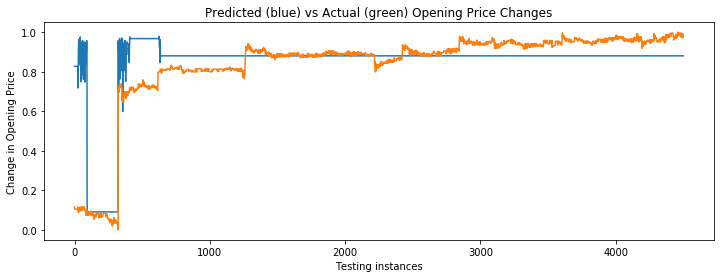

In [90]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(predictions)
plt.plot(train_label_normal)
plt.title("Predicted (blue) vs Actual (green) Opening Price Changes")
plt.xlabel("Testing instances")
plt.ylabel("Change in Opening Price")
plt.show()

# svm one


In [91]:
def svmtrain(data, labels):
	print(data.shape)
	print(labels.shape)
	return svm.SVR(kernel='linear', C=1).fit(data, labels)

In [92]:
print (train_label.shape)
print (train_set.shape)

(4500, 1)
(4500, 30)


In [93]:
svmclsfr = svmtrain(train_set, train_label)

(4500, 30)
(4500, 1)


/Users/chengjielin/tensorflow/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [94]:
svmpredictions = svmclsfr.predict(train_set) 
print(svmpredictions[0:10])
print(train_label[0:10])

[ 7589.70073981  7589.70073981  7589.70073981  7589.70073981  7589.70073981
  7589.70073981  7589.70073981  7589.70073981  7589.70073981  7589.70073981]
[[ 6999.8]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6984.1]
 [ 6983.6]
 [ 6983.1]
 [ 6983.1]
 [ 6983.1]]


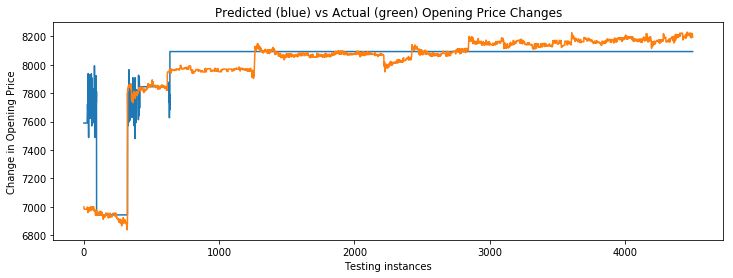

In [95]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(svmpredictions)
plt.plot(train_label)
plt.title("Predicted (blue) vs Actual (green) Opening Price Changes")
plt.xlabel("Testing instances")
plt.ylabel("Change in Opening Price")
plt.show()

# LSTM 30 features and no sum

In [ ]:
def new_lstm_train(data, labels):
	print(data.shape)
	print(labels.shape)
	X = numpy.reshape(data, (len(data), 1, 30))
# normalize
	#X = X / float(len(alphabet))
# one hot encode the output variable
	#y = np_utils.to_categorical(dataY)
# create and fit the model
	model = Sequential()
	model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2])))
	model.add(Dense(1, activation='sigmoid'))
	model.compile(loss='mean_squared_error', optimizer='adam')
	model.fit(X,labels, epochs=30, batch_size=5, verbose=2)
	return model

In [100]:
from sklearn.preprocessing import MinMaxScaler
sc2 = MinMaxScaler()
new_train_label_normal = sc2.fit_transform(train_label)
new_train_label_normal[:10]

array([[ 0.11683552],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10519509],
       [ 0.10483581],
       [ 0.10483581],
       [ 0.10483581]])

In [110]:
new_train_set=train_set
new_train_set.shape

(4500, 30)

In [111]:
new_lstm_clsfr = new_lstm_train(new_train_set, new_train_label_normal)
print("Training done.")

(4500, 30)
(4500, 1)
Epoch 1/30
28s - loss: 0.0083
Epoch 2/30
25s - loss: 0.0057
Epoch 3/30
25s - loss: 0.0055
Epoch 4/30
25s - loss: 0.0052
Epoch 5/30
25s - loss: 0.0050
Epoch 6/30
25s - loss: 0.0048
Epoch 7/30
25s - loss: 0.0046
Epoch 8/30
27s - loss: 0.0042
Epoch 9/30
25s - loss: 0.0041
Epoch 10/30
32s - loss: 0.0038
Epoch 11/30
30s - loss: 0.0035
Epoch 12/30
28s - loss: 0.0033
Epoch 13/30
28s - loss: 0.0031
Epoch 14/30
29s - loss: 0.0030
Epoch 15/30
28s - loss: 0.0029
Epoch 16/30
27s - loss: 0.0028
Epoch 17/30
29s - loss: 0.0028
Epoch 18/30
29s - loss: 0.0027
Epoch 19/30
27s - loss: 0.0027
Epoch 20/30
30s - loss: 0.0027
Epoch 21/30
33s - loss: 0.0027
Epoch 22/30
30s - loss: 0.0027
Epoch 23/30
29s - loss: 0.0027
Epoch 24/30
32s - loss: 0.0027
Epoch 25/30
33s - loss: 0.0026
Epoch 26/30
29s - loss: 0.0026
Epoch 27/30
27s - loss: 0.0026
Epoch 28/30
28s - loss: 0.0026
Epoch 29/30
28s - loss: 0.0026
Epoch 30/30
27s - loss: 0.0026
Training done.


In [113]:
new_lstm_predictions = new_lstm_clsfr.predict(numpy.reshape(new_train_set, (len(new_train_set), 1, 30)), verbose = True) 

4320/4500 [===========================>..] - ETA: 0s

In [ ]:
# uniform

In [114]:
print(new_lstm_predictions[0:10])
print(new_train_label_normal[0:10])

[[ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]
 [ 0.09892602]]
[[ 0.11683552]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10555436]
 [ 0.10519509]
 [ 0.10483581]
 [ 0.10483581]
 [ 0.10483581]]


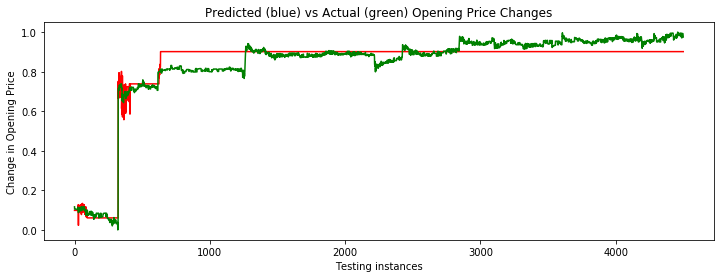

In [115]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(new_lstm_predictions,'r')
plt.plot(new_train_label_normal,'g')
plt.title("Predicted (blue) vs Actual (green) Opening Price Changes")
plt.xlabel("Testing instances")
plt.ylabel("Change in Opening Price")
plt.show()

# LSTM 30 TIMESTEPS WITH SUM

In [116]:
from sklearn.preprocessing import MinMaxScaler
sc2 = MinMaxScaler()
train_label_timestep = sc2.fit_transform(train_label)
train_label_timestep[:10]

array([[ 0.11683552],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10555436],
       [ 0.10519509],
       [ 0.10483581],
       [ 0.10483581],
       [ 0.10483581]])

In [117]:
sum_set_timestep=train_set.sum(axis=1)
sum_set_timestep=numpy.reshape(sum_set_timestep,(len(sum_set_timestep),1))
sum_set_timestep

array([[ 6.0504],
       [ 6.0504],
       [ 6.0504],
       ..., 
       [ 4.8163],
       [ 4.8163],
       [ 4.8163]])

In [121]:
print (sum_set_timestep.shape)
print(train_label_timestep.shape)
print (len(sum_set_timestep))

(4500, 1)
(4500, 1)
4500


In [186]:
seq_length = 30
dataX = []
dataY = []
for i in range(0, len(sum_set_timestep) - seq_length-seq_length, 1):
    seq_in=[]
    seq_in = sum_set_timestep[i:i + seq_length]
    seq_in=numpy.reshape(seq_in,(len(seq_in),))
    dataX.append(seq_in)
print (len(dataX))
print (dataX[4439])

for i in range(seq_length, len(train_label_timestep) - seq_length, 1):
    seq_out = train_label_timestep[i:i + seq_length]
    seq_out=numpy.reshape(seq_out,(len(seq_out),))
    dataY.append(seq_out)
print (len(dataY))
print (dataY[4439])

4440
[ 4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163
  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163
  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163  4.8163
  4.8163  4.8163  4.8163]
4440
[ 0.98491054  0.98685061  0.98491054  0.98491054  0.98491054  0.98491054
  0.99568873  0.99468276  0.98081483  0.98081483  0.9851261   0.9905152
  0.9905152   0.98634763  0.99547316  0.99547316  0.98720989  0.9732701
  0.97420421  0.97420421  0.97212043  0.97212043  0.99374865  0.99374865
  0.99374865  0.99374865  0.99374865  0.99123374  0.99123374  0.9811741 ]


In [187]:
dataX=numpy.reshape(dataX,(len(dataX),30))
dataY=numpy.reshape(dataY,(len(dataY),30))
print (dataX.shape)
print (dataY.shape)

(4440, 30)
(4440, 30)


In [195]:
numpy.amin(dataX)

-1.5272999999999999

In [204]:
from keras.layers import TimeDistributed
def lstm_train_timestep(data, labels):
    print(data.shape)
    print(labels.shape)
    X = numpy.reshape(data, (len(data), 30, 1))
    Y = numpy.reshape(labels, (len(labels), 30, 1))
# normalize
    #X = X / float(len(alphabet))
# one hot encode the output variable
    #y = np_utils.to_categorical(dataY)
# create and fit the model
    model = Sequential()
    model.add(LSTM(32, input_shape=(X.shape[1], X.shape[2]),return_sequences=True))
    model.add(TimeDistributed(Dense(1, activation='sigmoid')))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X,Y, epochs=30, batch_size=5, verbose=2)
    return model

In [205]:
lstm_clsfr_timestep = lstm_train_timestep(dataX, dataY)

(4440, 30)
(4440, 30)
Epoch 1/30
54s - loss: 0.0240
Epoch 2/30
67s - loss: 0.0151
Epoch 3/30
70s - loss: 0.0116
Epoch 4/30
63s - loss: 0.0108
Epoch 5/30
65s - loss: 0.0112
Epoch 6/30
66s - loss: 0.0121
Epoch 7/30
72s - loss: 0.0106
Epoch 8/30
63s - loss: 0.0093
Epoch 9/30
63s - loss: 0.0091
Epoch 10/30
67s - loss: 0.0088
Epoch 11/30
62s - loss: 0.0088
Epoch 12/30
67s - loss: 0.0085
Epoch 13/30
67s - loss: 0.0082
Epoch 14/30
59s - loss: 0.0082
Epoch 15/30
54s - loss: 0.0083
Epoch 16/30
52s - loss: 0.0078
Epoch 17/30
52s - loss: 0.0077
Epoch 18/30
53s - loss: 0.0076
Epoch 19/30
55s - loss: 0.0076
Epoch 20/30
57s - loss: 0.0076
Epoch 21/30
63s - loss: 0.0073
Epoch 22/30
65s - loss: 0.0072
Epoch 23/30
64s - loss: 0.0072
Epoch 24/30
56s - loss: 0.0074
Epoch 25/30
56s - loss: 0.0069
Epoch 26/30
64s - loss: 0.0069
Epoch 27/30
74s - loss: 0.0067
Epoch 28/30
64s - loss: 0.0066
Epoch 29/30
60s - loss: 0.0066
Epoch 30/30
59s - loss: 0.0068


In [206]:
lstm_predictions_timestep = lstm_clsfr_timestep.predict(numpy.reshape(dataX, (len(dataX), 30, 1)), verbose = 0) 

In [207]:
lstm_predictions_timestep.shape

(4440, 30, 1)

In [208]:
lstm_predictions_timestep[0]

array([[ 0.76423949],
       [ 0.60362524],
       [ 0.39262378],
       [ 0.24778976],
       [ 0.19021432],
       [ 0.17925152],
       [ 0.18059038],
       [ 0.17999798],
       [ 0.17794321],
       [ 0.17705467],
       [ 0.17686267],
       [ 0.17653739],
       [ 0.17610842],
       [ 0.17578699],
       [ 0.17557019],
       [ 0.17538762],
       [ 0.17522366],
       [ 0.1750883 ],
       [ 0.17498079],
       [ 0.17489311],
       [ 0.17482048],
       [ 0.17476112],
       [ 0.17471305],
       [ 0.17467417],
       [ 0.17464259],
       [ 0.16961391],
       [ 0.17091197],
       [ 0.15676369],
       [ 0.15708995],
       [ 0.19536567]], dtype=float32)

In [213]:
lstm_predictions_timestep[2][2]

array([ 0.39262378], dtype=float32)

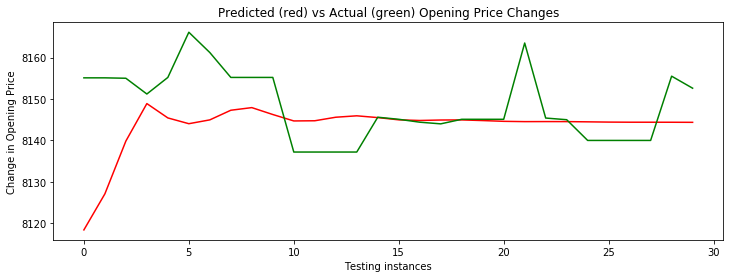

In [238]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))
plt.plot(sc2.inverse_transform(lstm_predictions_timestep[2900])+50,'r')
plt.plot(sc2.inverse_transform(numpy.reshape(dataY[2900], (len(dataY[4438]), 1))),'g')
plt.title("Predicted (red) vs Actual (green) Opening Price Changes")
plt.xlabel("Testing instances")
plt.ylabel("Change in Opening Price")
plt.show()